<a href="https://colab.research.google.com/github/Rj-pogman/Stockprediction_LSTM/blob/main/Stockprediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt


In [ ]:
data = pdr.get_data_tiingo('AAPL', api_key = '015092be2ad330200af12f96e56ad0450ed1d848')

In [ ]:
data.to_csv('AAPL.csv')

In [ ]:
data = pd.read_csv('AAPL.csv')

In [ ]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-21 00:00:00+00:00,111.73,111.990,110.01,110.12,29264571,26.289197,26.350373,25.884495,25.910377,117058284,0.0,1.0
1,AAPL,2016-11-22 00:00:00+00:00,111.80,112.420,111.40,111.95,25965534,26.305668,26.451549,26.211551,26.340961,103862136,0.0,1.0
2,AAPL,2016-11-23 00:00:00+00:00,111.23,111.510,110.33,111.36,27426394,26.171551,26.237433,25.959788,26.202139,109705576,0.0,1.0
3,AAPL,2016-11-25 00:00:00+00:00,111.79,111.870,110.95,111.13,11475922,26.303315,26.322138,26.105669,26.148022,45903688,0.0,1.0
4,AAPL,2016-11-28 00:00:00+00:00,111.57,112.465,111.39,111.43,27193983,26.251550,26.462137,26.209198,26.218609,108775932,0.0,1.0


In [ ]:
d1 = data.reset_index()['close']

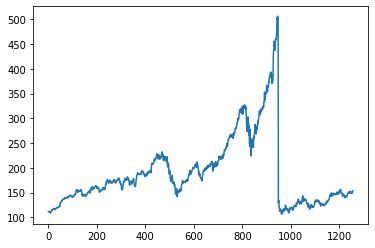

In [ ]:
plt.plot(d1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
d1 = scaler.fit_transform(np.array(d1).reshape(-1,1))

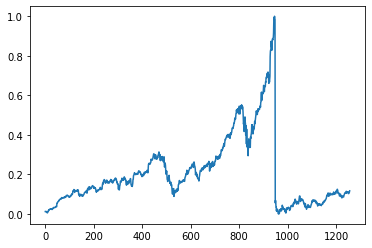

In [ ]:
plt.plot(d1)

In [ ]:
training_size = int(len(d1)*0.65)
test_size = len(d1)-training_size
train_data,test_data = d1[0:training_size,:],d1[training_size:len(d1),:1]

In [ ]:
def createdataset(dataset, time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
time_step=100
X_train,Y_train = createdataset(train_data,time_step)
X_test,Y_test = createdataset(test_data,time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data =(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 307ms/step - loss: 0.0121 - val_loss: 0.0221
Epoch 2/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0033 - val_loss: 0.0225
Epoch 3/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0014 - val_loss: 0.0205
Epoch 4/100
12/12 [==============================] - 2s 200ms/step - loss: 7.7387e-04 - val_loss: 0.0218
Epoch 5/100
12/12 [==============================] - 2s 198ms/step - loss: 5.4279e-04 - val_loss: 0.0212
Epoch 6/100
12/12 [==============================] - 2s 198ms/step - loss: 4.7728e-04 - val_loss: 0.0201
Epoch 7/100
12/12 [==============================] - 2s 198ms/step - loss: 4.4516e-04 - val_loss: 0.0206
Epoch 8/100
12/12 [==============================] - 2s 200ms/step - loss: 4.2785e-04 - val_loss: 0.0208
Epoch 9/100
12/12 [==============================] - 2s 199ms/step - loss: 4.1312e-04 - val_loss: 0.0197
Epoch 10/100
12/12 [==============================] - 2s 202ms/step

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

195.95214586798474

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

185.8713597777149

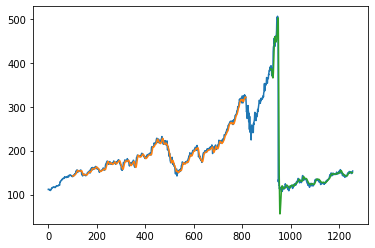

In [ ]:
look_back=100
trainPredictplot = np.empty_like(d1)
trainPredictplot[:, :] = np.nan
trainPredictplot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictplot = np.empty_like(d1)
testPredictplot[:, :] = np.nan
testPredictplot[len(train_predict)+(look_back*2)+1:len(d1)-1, :]=test_predict
plt.plot(scaler.inverse_transform(d1))
plt.plot(trainPredictplot)
plt.plot(testPredictplot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input=temp_input[0].tolist()

Logic for predicting the future stocks

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<100):
  if(len(temp_input)>100):

    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1, n_steps, 1))
    yhat=model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i=i+1

[0.10788773]
1 day input [0.07544145 0.07621791 0.08295554 0.08811522 0.09450219 0.09117095
 0.09585473 0.09432686 0.09718222 0.1059737  0.10429555 0.09906074
 0.08919224 0.09845961 0.09658109 0.10008766 0.10449593 0.10557295
 0.10001252 0.09552912 0.09718222 0.09773325 0.09688165 0.10149029
 0.10046337 0.10073889 0.09843456 0.09830933 0.09708203 0.09773325
 0.10532248 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719
 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612
 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.1

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [ ]:
len(d1)

1257

In [ ]:
d3=d1.tolist()
d3.extend(lst_output)

In [ ]:
day_new.shape


(100,)

In [ ]:
day_pred.shape

(100,)

Prediction for the next 100 days

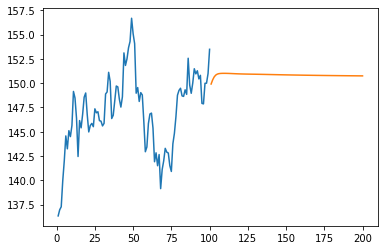

In [ ]:
plt.plot(day_new,scaler.inverse_transform(d1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

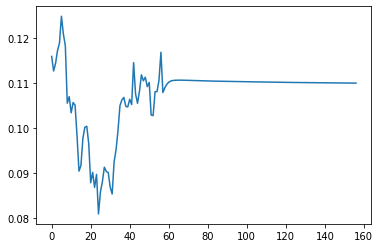

In [ ]:
d3=d1.tolist()
d3.extend(lst_output)
plt.plot(d3[1200:])